In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("All libraries imported successfully!")


All libraries imported successfully!


In [22]:
import pandas as pd


df = pd.read_csv("D:\\projects\\bangalore-house-price-analysis\\data\\Bengaluru_House_Data.csv")
df.head()


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [23]:
df.shape


(13320, 9)

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


## Dataset Overview

This dataset contains real estate listings from Bangalore, including
location, size, total square feet, number of bathrooms, and price.
The goal is to analyze factors affecting house prices and identify
pricing patterns across different localities.


In [25]:
df.isnull().sum()


area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [26]:
df = df.dropna()
df.shape


(7496, 9)

In [27]:
df = df[['location', 'size', 'total_sqft', 'bath', 'price']]
df.head()


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
5,Whitefield,2 BHK,1170,2.0,38.00
11,Whitefield,4 Bedroom,2785,5.0,295.00


In [28]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df[['size', 'bhk']].head()


,size,bhk
0,2 BHK,2
1,4 Bedroom,4
3,3 BHK,3
5,2 BHK,2
11,4 Bedroom,4


## Feature Engineering: BHK

Extracted the number of bedrooms (BHK) from the size column
to enable price comparison across different house types.


In [29]:
def convert_sqft(x):
    try:
        if '-' in x:
            a, b = x.split('-')
            return (float(a) + float(b)) / 2
        return float(x)
    except:
        return None

df['total_sqft'] = df['total_sqft'].apply(convert_sqft)
df = df.dropna()
df.head()


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
11,Whitefield,4 Bedroom,2785.0,5.0,295.00,4


## Price per Square Foot

Created a standardized metric (price per sqft) to compare
property values across locations and house sizes.


In [30]:
df = df[df['total_sqft'] / df['bhk'] >= 300]
df.shape


(7439, 6)

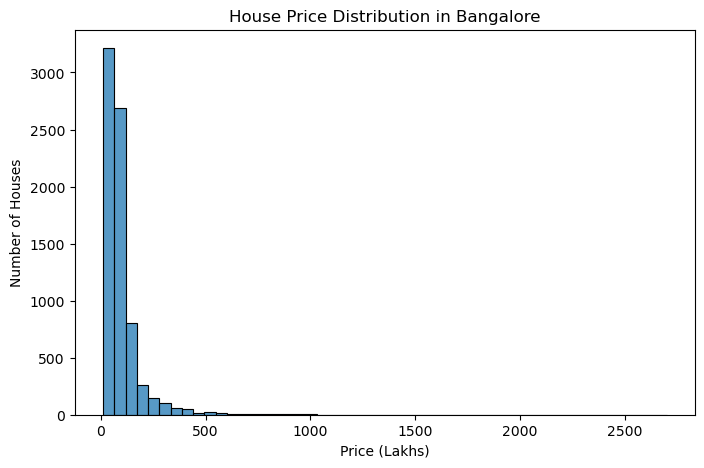

In [31]:


plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=50)
plt.title("House Price Distribution in Bangalore")
plt.xlabel("Price (Lakhs)")
plt.ylabel("Number of Houses")
plt.show()


In [32]:
# Selecting features and target for prediction

X = df[['location', 'total_sqft', 'bath', 'bhk']]
y = df['price']



In [33]:
# Convert location into numerical data using one-hot encoding

X = pd.get_dummies(X, drop_first=True)
X.head()


,total_sqft,bath,bhk,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Rachenahalli,location_ Thanisandra,location_ Whitefield,location_1 Giri Nagar,...,location_Volagerekallahalli,location_Whitefield,location_Wilson Garden,location_Yelachenahalli,location_Yelahanka,location_Yelahanka New Town,location_Yelenahalli,location_Yemlur,location_Yeshwanthpur,location_Yeshwanthpur Industrial Suburb
0,1056.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2600.0,5.0,4,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1521.0,3.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1170.0,2.0,2,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
11,2785.0,5.0,4,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)





LinearRegression()

In [36]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2_score(y_test, y_pred)


0.3196069596812541

In [37]:
model.coef_


array([ 6.74319333e-02,  1.90028813e+01, -8.82165606e-02,  1.25283119e+00,
       -5.79962501e+01, -9.42359830e+00, -7.47904363e+00, -8.60365713e+00,
       -6.36856612e-09, -1.27763923e+02,  1.38608698e-08, -1.05670181e+02,
       -3.75956845e+00, -4.70919620e+01,  6.98592379e+01, -1.18070879e+01,
       -3.65626010e+01, -1.42138686e+01,  9.11002394e+01, -4.38093160e+01,
        1.24506983e-09, -4.16283007e+01, -4.09009581e+00,  1.63004946e+01,
        1.86009892e+01, -2.53003770e+01, -3.92213497e+01,  5.43494139e-10,
       -4.82518979e+01, -4.37619628e+01, -4.78953045e+01, -5.24708937e+01,
       -4.50432648e+01, -8.93436436e-11, -5.40165912e+01, -8.31034410e+01,
       -3.43637878e+01, -3.40531625e+01, -3.83838617e+01, -4.31950164e+01,
       -5.73528717e+01, -5.14534567e+01, -3.84570619e+01, -4.11241709e+01,
       -2.66865843e+01, -2.42124714e+01,  2.88012736e+01, -4.45507601e-01,
       -3.29317591e+01, -6.79729033e+01, -4.22381424e+01, -4.40687169e+01,
        1.60244484e+02, -

In [38]:
model.intercept_


-19.451293613954974

Model Interpretation:
The model assigns weights to location, square footage,
number of bathrooms, and BHK to estimate house prices.
Location-related features have the highest influence.


In [39]:
# Example prediction: 2 BHK, 1000 sqft, 2 bath in a specific location

example = X_train.iloc[0:1]
model.predict(example)


array([53.57281765])